In [1]:
from data_clean_script import *
X,y = split_with_bow()
X_train, X_test, y_train, y_test = rescale_train_test(X,y)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ryanmurray/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ryanmurray/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import pickle

In [3]:
with open('random_forest_best_model.pkl', 'rb') as f:
    rf = pickle.load(f)

In [4]:
probabilities = rf.predict_proba(X_test)

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

0.7072288461503831


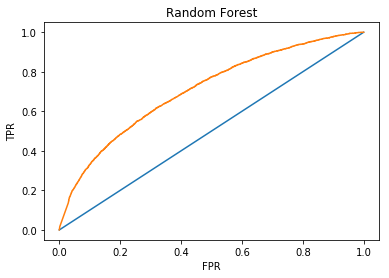

In [7]:
fpr, tpr,thresh = roc_curve(y_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.title('Random Forest')
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.draw()
print(roc_auc)

In [26]:
fnr =1- tpr

In [25]:
def get_thresh(fpr,fnr,thresh):
    for i,j,k in zip(fpr,fnr,thresh):
        if round(i,3) == round(4*j,3):
            return k

In [30]:
threshold = get_thresh(fpr,1-tpr,thresh)

In [31]:
threshold

0.09799168729221426

In [43]:
preds = (probabilities[:,1] > threshold).astype(int)

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
confusion_matrix(y_test,preds)

array([[ 9728, 15044],
       [  532,  2965]])

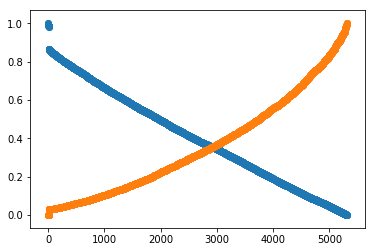

In [35]:
plt.scatter(range(len(fnr)),fnr)
plt.scatter(range(len(fpr)),fpr)